# Лабораторна робота 3

## Тема: OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version).

## Мета: знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

*Зробив: Савченко Андрій*

*Виконав: 21.10.2024*

## Завдання для самостіної роботи

### Обгрунтувати оптимальне значення порогу бінаризації за допомогою гістограми.

### Написати код, який би виводив зображення засобами бібіліотеки cv2.

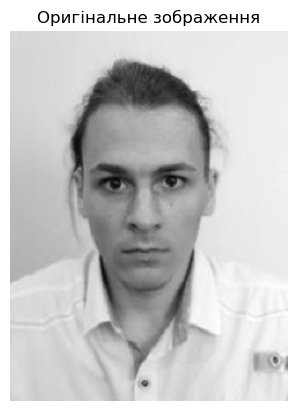

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення в сірому форматі
image_path = 'Andrey.jpg'  # Шлях до зображення
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Виведення оригінального зображення
plt.imshow(image, cmap='gray')
plt.title('Оригінальне зображення')
plt.axis('off')
plt.show()

### 1. Негатив

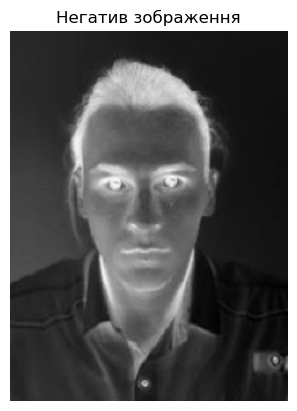

In [3]:
# Створення негативу зображення
negative_image = 255 - image

# Виведення негативу
plt.imshow(negative_image, cmap='gray')
plt.title('Негатив зображення')
plt.axis('off')
plt.show()

### 2. Логарифмічні перетворення

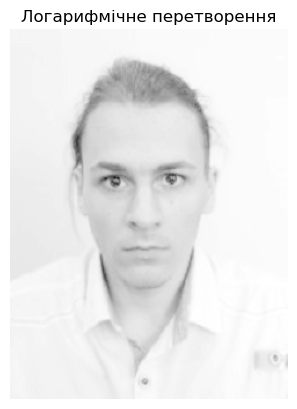

In [4]:
# Логарифмічне перетворення
c = 255 / np.log(1 + np.max(image))
log_image = c * np.log(1 + image)
log_image = np.array(log_image, dtype=np.uint8)

# Виведення логарифмічного перетворення
plt.imshow(log_image, cmap='gray')
plt.title('Логарифмічне перетворення')
plt.axis('off')
plt.show()

### 3. Степенева(гамма-коеркція)

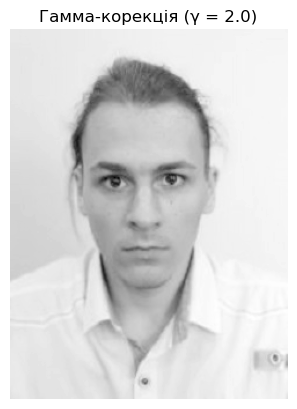

In [5]:
# Функція для гамма-корекції
def gamma_correction(image, gamma):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

# Гамма-корекція із гамма = 2.0
gamma_corrected_image = gamma_correction(image, 2.0)

# Виведення результату гамма-корекції
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Гамма-корекція (γ = 2.0)')
plt.axis('off')
plt.show()

### 4. Соляризація зображення

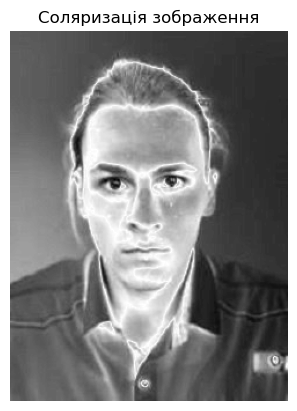

In [6]:
# Інвертування пікселів, що перевищують певний поріг
threshold = 128
solarized_image = np.where(image > threshold, 255 - image, image)

# Виведення соляризованого зображення
plt.imshow(solarized_image, cmap='gray')
plt.title('Соляризація зображення')
plt.axis('off')
plt.show()

### 5. Еквалізація гістограми

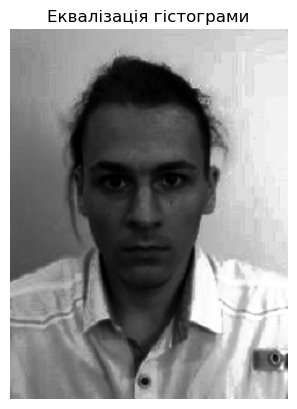

In [7]:
# Еквалізація гістограми
equalized_image = cv2.equalizeHist(image)

# Виведення еквалізованого зображення
plt.imshow(equalized_image, cmap='gray')
plt.title('Еквалізація гістограми')
plt.axis('off')
plt.show()

### 6. Оцінка гістограми

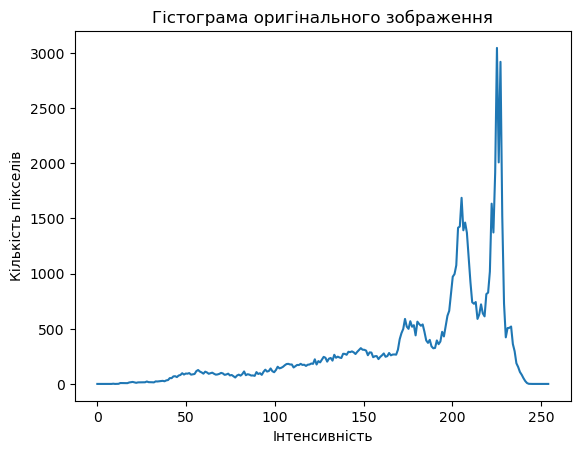

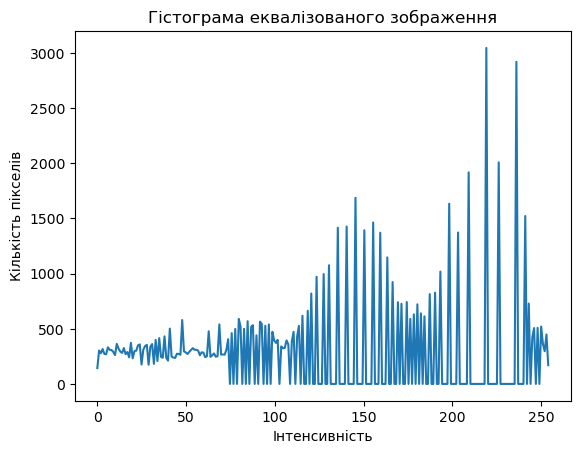

In [9]:
# Оцінка гістограми для оригінального зображення
histogram, bin_edges = np.histogram(image, bins=256, range=(0, 255))

# Виведення гістограми
plt.figure()
plt.title("Гістограма оригінального зображення")
plt.xlabel("Інтенсивність")
plt.ylabel("Кількість пікселів")
plt.plot(bin_edges[0:-1], histogram)
plt.show()

# Оцінка гістограми для еквалізованого зображення
histogram_eq, bin_edges_eq = np.histogram(equalized_image, bins=256, range=(0, 255))

# Виведення гістограми еквалізованого зображення
plt.figure()
plt.title("Гістограма еквалізованого зображення")
plt.xlabel("Інтенсивність")
plt.ylabel("Кількість пікселів")
plt.plot(bin_edges_eq[0:-1], histogram_eq)
plt.show()

## Завдання

### 1. Створити Notebook-документ lab_3_StudentLastName за допомогою Jupyter Notebook або Jupyter Lab. (Див. тут, тут і тут).

### 2. Відобразити в робочому документі (“зошиті” ipython) виконання пунктів 1-6 наведених нижче, скориставшись інтерактивними посиланнями на відповідну документацію. В якості зображення використати власний портрет, отриманий за допомогою цифрової камери

### 3. Робочий документ оформити у вигляді Notebook-документу (файл .ipynb).

### 4. Дати відповіді на контрольні запитання.

### 5. Скомпілювати звіт у форматі .html. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

jupyter nbconvert lab_3_StudentLastName.ipynb --to html або за допомогою Qurto:
quarto preview lab_3_StudentLastName.ipyn

### 6. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: 
lab_3_StudentLastName.ipynb та lab_1_StudentLastName.html

## Контрольні запитання

### 1. У чому полягає сенс градаційних перетворень?

Градаційні перетворення — це методи зміни інтенсивності (яскравості) пікселів зображення з метою покращення його візуальних властивостей або для підготовки до подальшої обробки. В основі градаційних перетворень лежить зміна значень пікселів у межах заданого діапазону інтенсивностей. Це дозволяє покращити контраст, виділити деталі або адаптувати зображення для подальшого аналізу.

Основні види градаційних перетворень:

-Лінійні перетворення — зміна рівнів інтенсивності за допомогою лінійної функції (напр. підвищення/пониження контрасту).

-Логарифмічні перетворення — стискування або розтягування динамічного діапазону інтенсивностей за допомогою логарифмічних функцій (для зображень з великим діапазоном яскравості).

-Степеневі перетворення (гамма-корекція) — підсилення або послаблення певних рівнів яскравості.

-Перетворення негативу — інвертування інтенсивностей пікселів, що дозволяє краще побачити деталі на світлих ділянках.

Сенс градаційних перетворень полягає в тому, щоб адаптувати яскравість зображення для покращення його візуального сприйняття, вирівняти контрастність або підготувати зображення для більш точного аналізу комп'ютерним зором.


### 2. На чому ґрунтуються гістограмні методи?

Гістограмні методи ґрунтуються на аналізі та перетворенні гістограми яскравості зображення. Гістограма — це графік, що показує розподіл пікселів зображення за рівнями яскравості (інтенсивності). Гістограмні методи дозволяють покращити контрастність зображення та вирівняти розподіл яскравостей для кращого відображення деталей.

Основні гістограмні методи:

-Вирівнювання гістограми - цей метод перетворює зображення так, щоб рівні яскравості були розподілені рівномірно по всьому діапазону інтенсивностей. Це дозволяє покращити контрастність зображення, особливо для зображень із нерівномірним розподілом яскравостей (коли значна частина пікселів знаходиться в обмеженому діапазоні).

-Гістограмна специфікація - цей метод налаштовує розподіл яскравості зображення так, щоб він відповідав певній цільовій гістограмі. Це може бути корисним для того, щоб адаптувати зображення до певних вимог або щоб зрівняти його вигляд з іншим зображенням.

Гістограмні методи дозволяють:

-Покращити контрастність зображення, роблячи темні області яскравішими та навпаки.

-Вирівнювати розподіл інтенсивностей, забезпечуючи рівномірне використання всього доступного діапазону яскравостей.
Оцінювати загальну яскравість і контраст зображення для його корекції або аналізу.